# Worldwide Commodity Prices 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import autoreload
import missingno as msno
import os
import sys
import csv

from collections import defaultdict, Counter

%matplotlib inline

pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 100)

sb.set_style('darkgrid')
sb.set()

In [13]:
dparser = lambda x: pd.datetime.strptime(x, "%Y-%m-%d")

df = pd.read_csv("D:\Open Classroom\Datasets\Worldwide Commodity Prices\commodity-prices-2016.csv", parse_dates=['Date'], date_parser=dparser)
df.head()

<ipython-input-13-9dcf80e11f43>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dparser = lambda x: pd.datetime.strptime(x, "%Y-%m-%d")


,Date,All Commodity Price Index,Non-Fuel Price Index,Food and Beverage Price Index,Food Price Index,Beverage Price Index,Industrial Inputs Price Index,Agricultural Raw Materials Index,Metals Price Index,Fuel Energy Index,Crude Oil petroleum,Aluminum,Bananas,Barley,Beef,Coal,Cocoa beans,Coffee Other Mild Arabicas,Coffee Robusta,Rapeseed oil,Copper,Cotton,Fishmeal,Groundnuts peanuts,Hides,China import Iron Ore Fines 62% FE spot,Lamb,Lead,Soft Logs,Hard Logs,Maize corn,Natural Gas - Russian Natural Gas border price in Germany,Natural Gas - Indonesian Liquefied Natural Gas in Japan,Natural Gas - Spot price at the Henry Hub terminal in Louisiana,Nickel,Crude Oil - petroleum-simple average of three spot prices,Crude Oil - petroleum - Dated Brent light blend,Oil Dubai,Crude Oil petroleum - West Texas Intermediate 40 API,Olive Oil,Oranges,Palm oil,Swine - pork,Poultry chicken,Rice,Rubber,Fish salmon,Hard Sawnwood,Soft Sawnwood,Shrimp,Soybean Meal,Soybean Oil,Soybeans,Sugar European import price,Sugar Free Market,Sugar U.S. import price,Sunflower oil,Tea,Tin,Uranium,Wheat,Wool coarse,Wool fine,Zinc
0,1980-01-01,NaN,NaN,NaN,NaN,189.310021,81.889650,78.900146,84.049004,NaN,72.089306,2054.860107,401.960839,66.584538,136.359985,39.696626,3167.156982,168.670013,162.559998,591.59,2592.633423,88.720001,986.555115,980.075188,59.099998,12.15,117.230011,1111.128418,84.391097,146.075470,105.506813,NaN,NaN,NaN,6584.800781,35.64,40.00,38.00,37.00,2271.722799,347.0,547.053904,72.418542,33.900295,395.0,68.820007,7.452902,297.609743,138.004214,13.33795,201.756039,525.581408,238.766037,NaN,17.299999,19.660000,566.926957,225.179901,16973.587904,40.0,175.634750,553.120940,684.277366,773.821533
1,1980-02-01,NaN,NaN,NaN,NaN,190.387928,83.048367,75.715154,88.345232,NaN,69.839420,2131.008545,372.185964,66.584538,134.549988,40.258127,3236.822998,164.829987,162.000000,596.60,2916.711991,97.209991,1040.805600,1000.375940,48.700001,12.15,122.010010,1166.243896,80.249203,159.565460,114.167831,NaN,NaN,NaN,6978.927734,35.09,38.50,36.00,37.04,2256.483179,350.0,555.317559,65.527797,32.554468,399.0,75.309998,7.604658,308.289257,131.231001,12.67656,198.261712,518.747086,241.361320,NaN,22.750000,24.689999,573.958609,233.094498,17090.213164,38.0,172.695236,568.154805,722.567093,868.620361
2,1980-03-01,NaN,NaN,NaN,NaN,194.060355,75.228895,69.002475,79.726312,NaN,70.981533,1978.378906,422.913536,69.897836,118.000000,40.827570,3091.097656,184.380005,169.890015,561.51,2303.827900,93.529999,960.434511,1009.398496,39.400002,12.15,119.320007,1117.742432,80.249203,155.275452,109.837318,NaN,NaN,NaN,6733.787109,36.01,38.25,35.75,39.52,2188.113541,338.0,518.131115,65.002072,31.826994,415.0,66.350006,7.400278,304.922239,131.231001,12.78680,186.103218,486.780096,227.075779,NaN,19.630001,21.180000,535.284522,226.833298,17460.590400,35.0,163.509323,552.745109,695.956860,740.752441
3,1980-04-01,NaN,NaN,NaN,NaN,186.137888,72.471253,67.877108,75.789658,NaN,70.400373,1932.455566,395.895579,69.897836,114.510010,41.405068,2910.098389,180.809998,162.899994,541.45,2074.547555,90.559998,944.360293,1015.037594,38.099998,12.15,132.720001,970.032715,87.497518,152.785461,108.262604,NaN,NaN,NaN,6233.369141,35.09,38.15,35.00,39.50,2081.167871,377.0,504.909268,51.858961,30.990399,419.0,60.549999,7.426402,302.950034,143.084123,12.34587,181.197933,451.065252,218.210476,NaN,21.250000,22.669998,486.062957,221.806793,17041.712600,32.0,156.528030,510.650280,688.130355,707.683105
4,1980-05-01,NaN,NaN,NaN,NaN,185.070241,69.588103,65.879671,72.266748,NaN,71.021190,1775.803711,444.968980,68.241187,110.500000,41.990735,2585.798828,190.540009,174.059998,536.44,2076.752309,88.399994,1014.684996,1035.338346,33.799999,12.15,142.070007,793.663086,87.497518,162.735474,109.837318,NaN,NaN,NaN,6000.769531,35.72,38.50,35.60,39.50,2044.541259,442.2,482.597402,54.900653,30.663035,433.0,60.389999,7.693488,310.720562,143.084123,12.01518,187.392923,463.190662,225.904457,NaN,30.939999,31.889999,502.763130,229.611206,17180.60473

In [14]:
df.shape

(434, 64)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 64 columns):
 #   Column                                                           Non-Null Count  Dtype         
---  ------                                                           --------------  -----         
 0   Date                                                             434 non-null    datetime64[ns]
 1   All Commodity Price Index                                        290 non-null    float64       
 2   Non-Fuel Price Index                                             302 non-null    float64       
 3   Food and Beverage Price Index                                    302 non-null    float64       
 4   Food Price Index                                                 302 non-null    float64       
 5   Beverage Price Index                                             434 non-null    float64       
 6   Industrial Inputs Price Index                                    434 non-null    f

In [16]:
df.isnull().sum()

Date                                                                 0
All Commodity Price Index                                          144
Non-Fuel Price Index                                               132
Food and Beverage Price Index                                      132
Food Price Index                                                   132
Beverage Price Index                                                 0
Industrial Inputs Price Index                                        0
Agricultural Raw Materials Index                                     0
Metals Price Index                                                   0
Fuel Energy Index                                                  144
Crude Oil petroleum                                                  0
Aluminum                                                             0
Bananas                                                              0
Barley                                                               0
Beef  

In [17]:
df.fillna(0.0, inplace=True)

In [18]:
round(df.describe(), 2)

,All Commodity Price Index,Non-Fuel Price Index,Food and Beverage Price Index,Food Price Index,Beverage Price Index,Industrial Inputs Price Index,Agricultural Raw Materials Index,Metals Price Index,Fuel Energy Index,Crude Oil petroleum,Aluminum,Bananas,Barley,Beef,Coal,Cocoa beans,Coffee Other Mild Arabicas,Coffee Robusta,Rapeseed oil,Copper,Cotton,Fishmeal,Groundnuts peanuts,Hides,China import Iron Ore Fines 62% FE spot,Lamb,Lead,Soft Logs,Hard Logs,Maize corn,Natural Gas - Russian Natural Gas border price in Germany,Natural Gas - Indonesian Liquefied Natural Gas in Japan,Natural Gas - Spot price at the Henry Hub terminal in Louisiana,Nickel,Crude Oil - petroleum-simple average of three spot prices,Crude Oil - petroleum - Dated Brent light blend,Oil Dubai,Crude Oil petroleum - West Texas Intermediate 40 API,Olive Oil,Oranges,Palm oil,Swine - pork,Poultry chicken,Rice,Rubber,Fish salmon,Hard Sawnwood,Soft Sawnwood,Shrimp,Soybean Meal,Soybean Oil,Soybeans,Sugar European import price,Sugar Free Market,Sugar U.S. import price,Sunflower oil,Tea,Tin,Uranium,Wheat,Wool coarse,Wool fine,Zinc
count,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00,434.00
mean,67.11,79.29,82.37,82.21,124.38,97.24,100.37,94.98,61.40,76.55,1672.91,574.57,106.22,119.25,51.58,1899.98,130.02,86.43,663.13,3447.21,73.58,879.36,1072.42,73.76,35.82,125.18,996.51,142.22,211.87,136.83,4.41,5.13,2.74,11076.00,40.64,41.70,39.48,41.09,3339.25,605.08,489.86,78.97,63.22,333.55,66.71,5.21,589.58,250.49,12.52,250.60,603.68,278.71,19.01,11.98,22.89,759.54,230.09,10689.30,24.95,166.34,566.71,823.87,1362.34
std,63.30,60.39,61.28,61.12,37.48,38.82,23.04,53.64,66.31,56.63,475.70,220.38,48.93,35.81,29.58,665.37,49.34,35.11,292.58,2382.21,22.61,444.82,467.22,17.74,43.99,25.60,710.90,43.00,84.64,57.44,3.76,5.40,2.64,7688.35,30.10,31.46,30.75,28.19,1133.11,245.49,225.81,27.19,21.99,135.72,44.16,1.45,232.91,71.30,2.21,94.47,239.69,104.44,12.76,6.08,4.08,358.74,59.76,6251.48,20.44,55.29,259.11,272.52,677.07
min,0.00,0.00,0.00,0.00,60.65,50.92,56.87,44.17,0.00,18.45,918.85,250.51,36.64,74.26,24.00,860.74,52.02,21.26,253.31,1272.07,37.03,373.16,555.73,28.59,10.51,76.97,351.64,55.87,76.41,65.35,0.00,0.00,0.00,3433.66,9.88,9.56,8.50,11.31,1736.47,232.38,162.79,19.10,30.66,162.10,22.12,2.40,169.63,109.22,7.94,133.49,301.59,158.31,0.00,2.78,15.49,332.55,134.05,3698.37,7.10,88.55,247.09,417.47,597.45
25%,0.00,0.00,0.00,0.00,89.73,71.33,88.68,57.08,0.00,34.51,1321.57,404.09,73.20,97.00,31.75,1410.66,91.82,56.85,436.91,1681.96,58.51,568.58,766.84,65.62,12.15,105.60,487.43,105.04,155.82,100.81,2.13,0.00,0.00,5725.37,18.43,18.64,16.82,19.90,2384.63,418.92,318.56,58.26,47.45,251.62,38.01,4.04,419.43,166.46,10.47,186.36,443.33,208.28,0.00,7.84,21.04,551.85,186.60,5651.05,10.20,128.25,390.10,634.64,875.36
50%,58.21,85.53,95.09,96.49,123.99,84.20,99.60,69.10,37.69,53.38,1570.03,499.95,91.06,112.43,39.50,1720.61,127.94,88.52,583.66,2370.61,71.55,692.20,906.60,75.18,13.41,122.71,658.54,149.00,197.38,114.20,2.94,3.79,2.27,8057.93,28.28,28.52,27.22,29.81,3150.83,519.00,433.33,72.45,60.24,290.00,50.56,5.15,600.82,281.64,12.35,210.02,531.97,235.57,25.77,10.65,21.85,630.57,211.25,7747.26,16.79,155.72,496.93,729.00,1088.87
75%,112.69,122.76,118.41,118.65,154.34,115.64,114.79,120.23,107.85,105.15,1908.46,724.08,123.16,122.53,58.26,2304.76,152.17,111.60,800.71,4954.95,83.56,1085.18,1216.61,85.43,36.63,147.11,1331.50,173.35,267.86,158.80,6.96,7.87,4.12,14802.10,56.02,57.37,54.60,58.03,3964.57,771.00,588.48,96.17,77.64,394.62,76.89,6.20,805.94,303.42,14.11,293.78,682.82,319.65,27.38,14.38,22.87,901.93,256.78,14742.15,35.54,180.32,

In [20]:
df.head()

,Date,All Commodity Price Index,Non-Fuel Price Index,Food and Beverage Price Index,Food Price Index,Beverage Price Index,Industrial Inputs Price Index,Agricultural Raw Materials Index,Metals Price Index,Fuel Energy Index,Crude Oil petroleum,Aluminum,Bananas,Barley,Beef,Coal,Cocoa beans,Coffee Other Mild Arabicas,Coffee Robusta,Rapeseed oil,Copper,Cotton,Fishmeal,Groundnuts peanuts,Hides,China import Iron Ore Fines 62% FE spot,Lamb,Lead,Soft Logs,Hard Logs,Maize corn,Natural Gas - Russian Natural Gas border price in Germany,Natural Gas - Indonesian Liquefied Natural Gas in Japan,Natural Gas - Spot price at the Henry Hub terminal in Louisiana,Nickel,Crude Oil - petroleum-simple average of three spot prices,Crude Oil - petroleum - Dated Brent light blend,Oil Dubai,Crude Oil petroleum - West Texas Intermediate 40 API,Olive Oil,Oranges,Palm oil,Swine - pork,Poultry chicken,Rice,Rubber,Fish salmon,Hard Sawnwood,Soft Sawnwood,Shrimp,Soybean Meal,Soybean Oil,Soybeans,Sugar European import price,Sugar Free Market,Sugar U.S. import price,Sunflower oil,Tea,Tin,Uranium,Wheat,Wool coarse,Wool fine,Zinc
0,1980-01-01,0.0,0.0,0.0,0.0,189.310021,81.889650,78.900146,84.049004,0.0,72.089306,2054.860107,401.960839,66.584538,136.359985,39.696626,3167.156982,168.670013,162.559998,591.59,2592.633423,88.720001,986.555115,980.075188,59.099998,12.15,117.230011,1111.128418,84.391097,146.075470,105.506813,0.0,0.0,0.0,6584.800781,35.64,40.00,38.00,37.00,2271.722799,347.0,547.053904,72.418542,33.900295,395.0,68.820007,7.452902,297.609743,138.004214,13.33795,201.756039,525.581408,238.766037,0.0,17.299999,19.660000,566.926957,225.179901,16973.587904,40.0,175.634750,553.120940,684.277366,773.821533
1,1980-02-01,0.0,0.0,0.0,0.0,190.387928,83.048367,75.715154,88.345232,0.0,69.839420,2131.008545,372.185964,66.584538,134.549988,40.258127,3236.822998,164.829987,162.000000,596.60,2916.711991,97.209991,1040.805600,1000.375940,48.700001,12.15,122.010010,1166.243896,80.249203,159.565460,114.167831,0.0,0.0,0.0,6978.927734,35.09,38.50,36.00,37.04,2256.483179,350.0,555.317559,65.527797,32.554468,399.0,75.309998,7.604658,308.289257,131.231001,12.67656,198.261712,518.747086,241.361320,0.0,22.750000,24.689999,573.958609,233.094498,17090.213164,38.0,172.695236,568.154805,722.567093,868.620361
2,1980-03-01,0.0,0.0,0.0,0.0,194.060355,75.228895,69.002475,79.726312,0.0,70.981533,1978.378906,422.913536,69.897836,118.000000,40.827570,3091.097656,184.380005,169.890015,561.51,2303.827900,93.529999,960.434511,1009.398496,39.400002,12.15,119.320007,1117.742432,80.249203,155.275452,109.837318,0.0,0.0,0.0,6733.787109,36.01,38.25,35.75,39.52,2188.113541,338.0,518.131115,65.002072,31.826994,415.0,66.350006,7.400278,304.922239,131.231001,12.78680,186.103218,486.780096,227.075779,0.0,19.630001,21.180000,535.284522,226.833298,17460.590400,35.0,163.509323,552.745109,695.956860,740.752441
3,1980-04-01,0.0,0.0,0.0,0.0,186.137888,72.471253,67.877108,75.789658,0.0,70.400373,1932.455566,395.895579,69.897836,114.510010,41.405068,2910.098389,180.809998,162.899994,541.45,2074.547555,90.559998,944.360293,1015.037594,38.099998,12.15,132.720001,970.032715,87.497518,152.785461,108.262604,0.0,0.0,0.0,6233.369141,35.09,38.15,35.00,39.50,2081.167871,377.0,504.909268,51.858961,30.990399,419.0,60.549999,7.426402,302.950034,143.084123,12.34587,181.197933,451.065252,218.210476,0.0,21.250000,22.669998,486.062957,221.806793,17041.712600,32.0,156.528030,510.650280,688.130355,707.683105
4,1980-05-01,0.0,0.0,0.0,0.0,185.070241,69.588103,65.879671,72.266748,0.0,71.021190,1775.803711,444.968980,68.241187,110.500000,41.990735,2585.798828,190.540009,174.059998,536.44,2076.752309,88.399994,1014.684996,1035.338346,33.799999,12.15,142.070007,793.663086,87.497518,162.735474,109.837318,0.0,0.0,0.0,6000.769531,35.72,38.50,35.60,39.50,2044.541259,442.2,482.597402,54.900653,30.663035,433.0,60.389999,7.693488,310.720562,143.084123,12.01518,187.392923,463.190662,225.904457,0.0,30.939999,31.889999,502.763130,229.611206,17180.60473

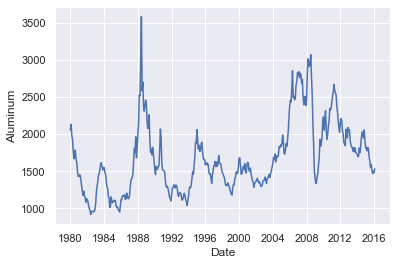

In [23]:
sb.lineplot(x = df['Date'], y = df['Aluminum'])

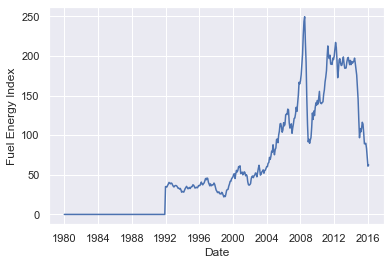

In [29]:
sb.lineplot(x = df['Date'], y = df['Fuel Energy Index'])

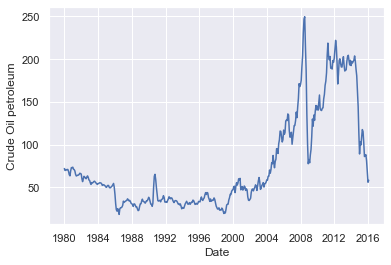

In [28]:
sb.lineplot(x = df['Date'], y = df['Crude Oil petroleum'])